Download data from [google](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing) or it's [mirror a](https://s3.amazonaws.com/mordecai-geo/GoogleNews-vectors-negative300.bin.gz)



Make sure you have widget extensions installed:

```jupyter nbextension enable --py --sys-prefix widgetsnbextension```

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import gensim
from wordcloud import WordCloud
from IPython.display import display, clear_output
import ipywidgets as widgets

In [28]:
modelName = 'GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(modelName, binary=True)
cloud = WordCloud()

In [29]:
# plot func
fig, ax = plt.subplots()
plt.close(fig)

def drawWordCloud(seedWord):
    try:
        closestWords = model.most_similar(seedWord, topn=40)
    except:
        closestWords = [ ('?', 1) ]
    closestWords = { k:v for k,v in closestWords }
    cloud_im = cloud.generate_from_frequencies(closestWords)
    
    ax.clear()
    ax.imshow(cloud_im)
    ax.axis('off')
    display(fig)

def on_input_change(change):
    clear_output(wait=True)
    drawWordCloud(change['new'])

inputField = widgets.Text('Utrecht', description='Seed word')
inputField.observe(on_input_change, names='value')

In [42]:
# plot func
fig2, ax2 = plt.subplots()
plt.close(fig2)

mya = ''
mylike = ''
myisto = ''

def drawAnalogy(a=None,like=None,isTo=None):
    global mya
    global mylike
    global myisto
    
    a = mya if a is None else a
    like = mylike if like is None else like
    isTo = myisto if isTo is None else isTo

    mya = a
    mylike = like
    myisto = isTo
    
    print '%s : ? :: %s : %s'%(a, like, isTo)
    try:
        closestWords = model.most_similar(positive=[a,isTo], negative=[like], topn=40)
    except:
        closestWords = [ ('?',1) ]
    closestWords = { k:v for k,v in closestWords }
    cloud_im = cloud.generate_from_frequencies(closestWords)
    
    ax2.clear()
    ax2.imshow(cloud_im)
    ax2.axis('off')
    display(fig2)    

def on_input_change_a(change):
    clear_output(wait=True)
    drawAnalogy(a=change['new'])

def on_input_change_like(change):
    clear_output(wait=True)
    drawAnalogy(like=change['new'])

def on_input_change_isTo(change):
    clear_output(wait=True)
    drawAnalogy(isTo=change['new'])

inputA = widgets.Text('King', description='a')
inputA.observe(on_input_change_a, names='value')

inputLike = widgets.Text('Man', description='like')
inputLike.observe(on_input_change_like, names='value')

inputIsTo = widgets.Text('Woman', description='is to')
inputIsTo.observe(on_input_change_isTo, names='value')


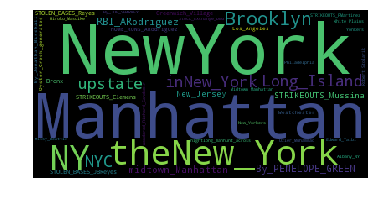

In [31]:
drawWordCloud(seedWord='Utrecht')
display(inputField)

London : ? :: Paris : France


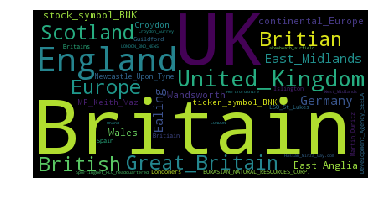

In [43]:
drawAnalogy(a='King',like='Man',isTo='Woman')
display(inputA)
display(inputLike)
display(inputIsTo)